In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 810M/817M [00:05<00:00, 178MB/s]
100% 817M/817M [00:05<00:00, 160MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/train')
print(file_names)

['cat.7673.jpg', 'dog.2997.jpg', 'dog.11520.jpg', 'dog.4568.jpg', 'cat.8025.jpg', 'dog.2151.jpg', 'dog.756.jpg', 'dog.594.jpg', 'dog.12057.jpg', 'dog.10690.jpg', 'dog.4431.jpg', 'cat.7950.jpg', 'dog.10157.jpg', 'dog.9161.jpg', 'dog.3859.jpg', 'cat.8514.jpg', 'dog.3552.jpg', 'dog.12240.jpg', 'cat.2252.jpg', 'dog.3323.jpg', 'dog.7773.jpg', 'dog.11321.jpg', 'dog.9589.jpg', 'dog.12208.jpg', 'cat.9275.jpg', 'dog.11293.jpg', 'dog.2025.jpg', 'dog.10150.jpg', 'cat.2424.jpg', 'cat.903.jpg', 'cat.7491.jpg', 'dog.3071.jpg', 'cat.1518.jpg', 'dog.6628.jpg', 'dog.8472.jpg', 'cat.8510.jpg', 'cat.6335.jpg', 'cat.7162.jpg', 'dog.2990.jpg', 'cat.1983.jpg', 'dog.3436.jpg', 'cat.12097.jpg', 'cat.4989.jpg', 'cat.4214.jpg', 'cat.3379.jpg', 'cat.7411.jpg', 'dog.9758.jpg', 'dog.1577.jpg', 'cat.53.jpg', 'dog.5081.jpg', 'cat.7008.jpg', 'cat.8243.jpg', 'cat.8095.jpg', 'dog.4031.jpg', 'dog.3307.jpg', 'dog.11914.jpg', 'cat.1661.jpg', 'dog.716.jpg', 'cat.2327.jpg', 'dog.6740.jpg', 'cat.3359.jpg', 'dog.4176.jpg', 'd

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

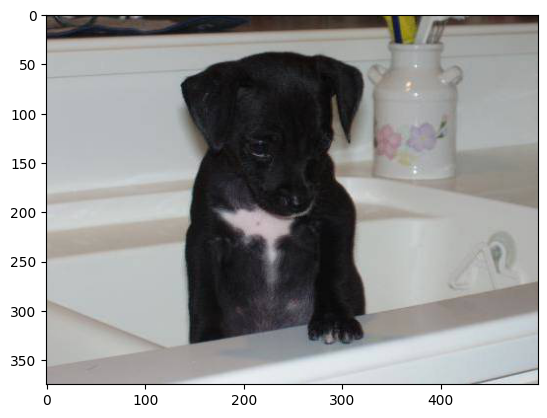

In [ ]:
# display dog image
img = mpimg.imread('/content/train/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
dog
dog
dog
cat


In [ ]:
file_names = os.listdir('/content/train/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(len(filenames)):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.7673.jpg', 'dog.2997.jpg', 'dog.11520.jpg', 'dog.4568.jpg', 'cat.8025.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1018  982]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 15s 40ms/step - loss: 0.1858 - acc: 0.9356
Epoch 2/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0676 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0535 - acc: 0.9812
Epoch 4/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0444 - acc: 0.9856
Epoch 5/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0388 - acc: 0.9887


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 1s 42ms/step - loss: 0.0824 - acc: 0.9550
Test Loss = 0.08237873017787933
Test Accuracy = 0.9549999833106995


Path of the image to be predicted: /content/cat.jpg


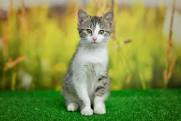

1/1 [==============================] - 1s 893ms/step
[[ 4.5123816 -4.7560096]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
from tensorflow.keras.models import load_model
model.save('model.h5')

In [ ]:
loaded_model = load_model(
       ('model.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)